### pandas可视化（1）【官方文档解读】--基础绘图 
前段时间想学习python的可视化，自己也做过各种探索

从seaborn（色彩很好看，但是个人感觉调色太专业，底子没打好学起来很累）

到matplotlib（python基础绘图模块，但是写起来特别麻烦，学的不深入图不好看）

再到pyplot（交互式很强，学起来难度太大）

学了pandas的可视化

有以下两个原因：

（1）pandas我之前学过，也写过官方文档翻译连载，比较熟悉

（2）pandas可视化的图风格很好看，很商务风

如绘图过程中，中文字体和负号显示有问题，可以参照如下链接修改配置参数设置正常显示：

https://www.joinquant.com/post/441

In [1]:
#基于matplotlib

import matplotlib.pyplot as plt
#注：导入matplotlib.pyplot

In [2]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

#注：使用ggplot样式，并且将图画在jupyter notebook中

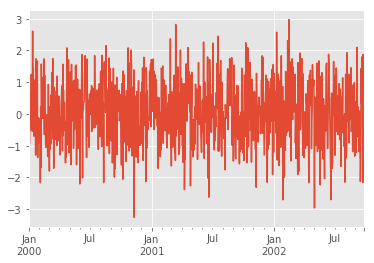

In [6]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

#注：使用pandas创建一个Series（序列），序列值是随机生成的1000个标准正态分布值，索引是从2000-1-1开始的1000个时间序列值

#然后使用plot默认画图

#可以看出，这个图非常不规则，因为相邻的两个值也是随机大小

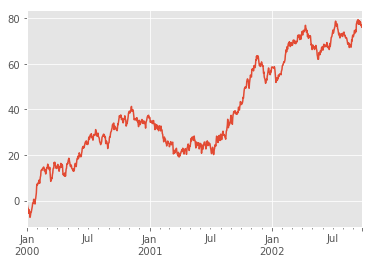

In [8]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

#注：这里加上了ts = ts.cumsum()，意思是返回累积值，在时间序列分析中，经常观察累积值曲线观察走势

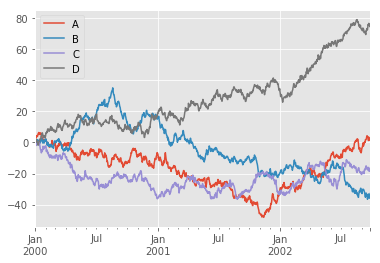

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

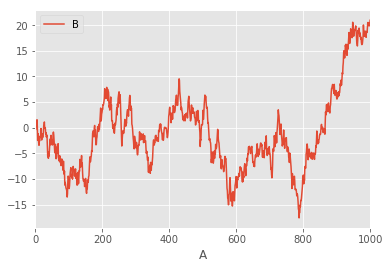

In [16]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

#注：使用DataFrame创建了2组数据，也是1000个标准正态分布，分别命名为B、C（就行excel中列名）

并且求累积值

再在原来的df（DataFrame的简称）(这里名字是df3）上加上一列名为A

A的值是0-999（使用df3的长度为1000，然后range被套列表生成一列数，作为x轴），y轴是B列数据（累积值），c列数据最后绘图没有用上


### 条形图、直方图

In [17]:
#条形图

#对于标记的非时间序列数据，你可能希望生成条形图：

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

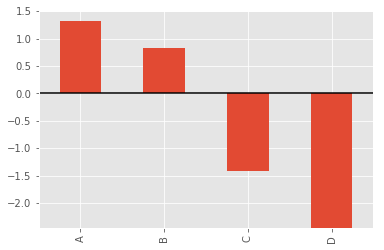

In [20]:
plt.figure();
df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')

注：df.iloc[5]意思是取出df第6行（索引为5），然后绘制条形图

plt.axhline(0, color='k')指的是在y=0的位置画一条黑色的线


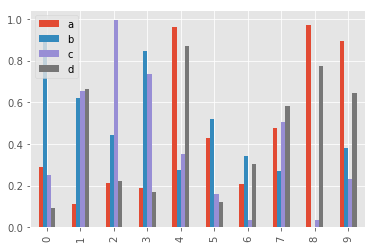

In [21]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()

#注：如果看了前一章，以上代码很好理解，这里同一幅图绘制多个条形图比较

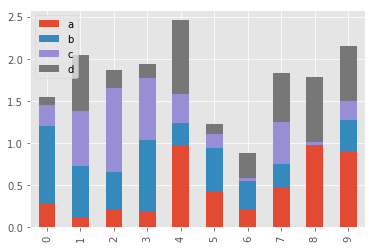

In [28]:
df2.plot.bar(stacked=True)
#注：将a、b、c、d数据叠加起来绘制条形图

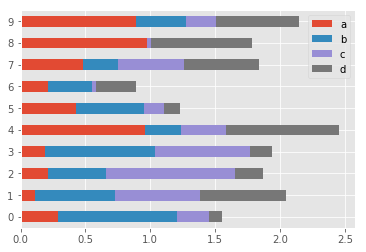

In [29]:
df2.plot.barh(stacked=True)

#注：绘制水平叠加条形图

###  直方图

In [30]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.head()

#注：以标准正态分布为基础产生一个df4

,a,b,c
0,2.917678,1.202035,1.162348
1,0.821297,0.882269,-1.691455
2,1.326987,-1.374579,-2.043529
3,1.633514,0.452334,-0.418447
4,0.815388,-0.104967,-0.426562


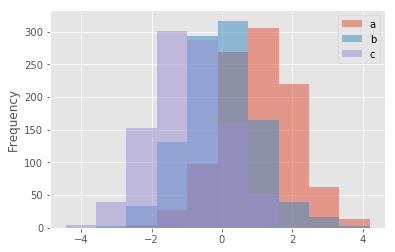

In [32]:
plt.figure()
df4.plot.hist(alpha=0.5)

#注：绘制直方图，alpha=0.5意思为透明度为50%
#注：明明有三列数据，画出有六种颜色，应该是是颜色叠加出了新颜色

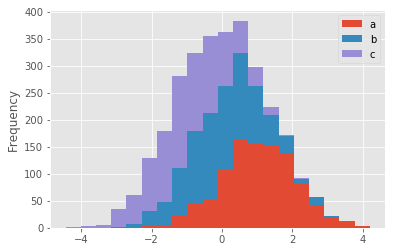

In [34]:
plt.figure()
df4.plot.hist(stacked=True, bins=20)

#注：画堆积直方图（不会重叠，直观）bins=20指的是分为20个区段

#图中没有显示20个因为正态分布距离中心远处取值可能心很小，可能只有个别值，在图中不明显

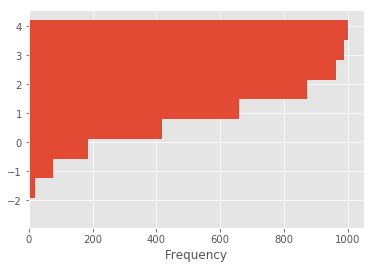

In [35]:
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

#注：取出A列画横向累积直方图，采用默认10个区段

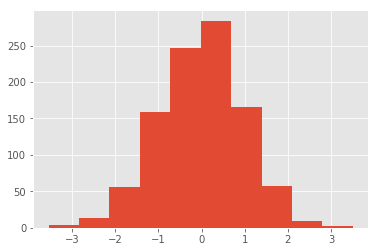

In [37]:
plt.figure()
df['A'].diff().hist()
#注：diff为差分，即后一个减去前一个,我们看一下：

In [39]:
df['A'].diff().head()

#注：显示A列中差分结果的前五个数

#注意，第一个值不存在,因为原来的第一个数减去前面一个（第一个的前面一个数不存在），所以为NaN

#差分后绘制的直方图为（默认为十个区段吧）：

2000-01-01         NaN
2000-01-02   -0.495523
2000-01-03    0.324097
2000-01-04    1.207484
2000-01-05   -0.224293
Freq: D, Name: A, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D510240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6696A0>]], dtype=object)

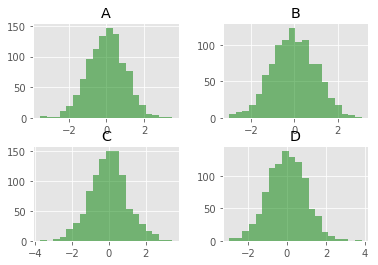

In [41]:
plt.figure()
df.diff().hist(color='g', alpha=0.5, bins=20)
#注：df中四栏（4列）分别绘制一阶差分的图（绿色，半透明，分20区段），有种2x2子图的感觉

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D86E908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D99BB38>]], dtype=object)

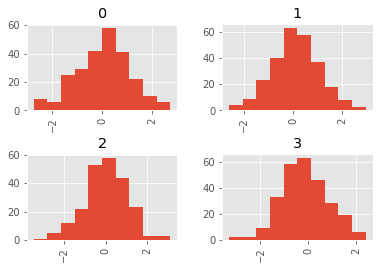

In [42]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000),figsize=(6, 4))

注：这里产生1000个正态分布的随机数，然后使用hist方法中的by参数随机产生0-3中的整数（即0、1、2、3）

将原来的1000个正态分布的随机数对应上分组绘制四张图

图的长宽大小为6x4

### 箱线图 

In [43]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.head()

#注：使用numpy产生一个10行5列的矩阵，矩阵内的元素是随机产生的标准正态分布数字

#然后将矩阵转为df，给这五列数据栏位命名为A、B、C、D、E，并显示其前五行观察

,A,B,C,D,E
0,0.702481,0.259519,0.691050,0.108614,0.816410
1,0.679365,0.224203,0.768948,0.014611,0.719540
2,0.238057,0.476996,0.801938,0.950485,0.279253
3,0.945721,0.766048,0.465755,0.964957,0.188880
4,0.217900,0.718636,0.000910,0.938701,0.194867


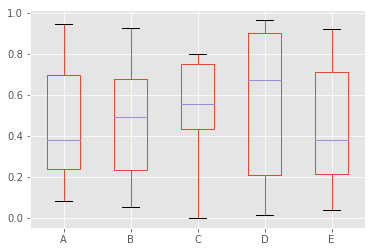

In [46]:
df.plot.box()  #注：绘制箱线图

注：这里有A~E五个箱线图放在一张图，理解为5次试验，每次的即为其对应列中的十行（10个数字）的箱线图

箱线图解释如下图：


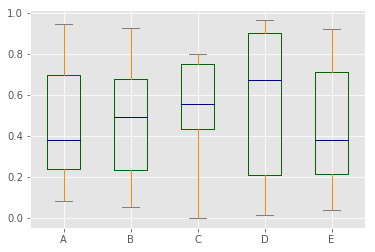

In [47]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')

df.plot.box(color=color, sym='r+')

注：绘制箱线图，这里增加了箱线图每部分线条颜色的设置，至于sym官方解释是：specify fliers style

直译为：指定传单风格，我们暂且可以认为是绘图的某种风格，我把这个参数去掉绘图发现没什么区别


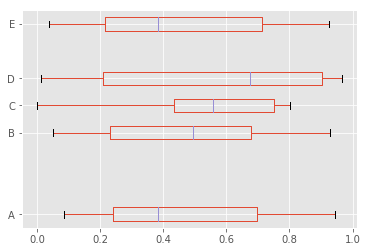

In [49]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])
#注：这里vert = False绘制水平箱线图，并且将幕布竖直方向分为8块等大小区域

#将5个箱线图从下到上依次画在1、4、5、6、8五个位置

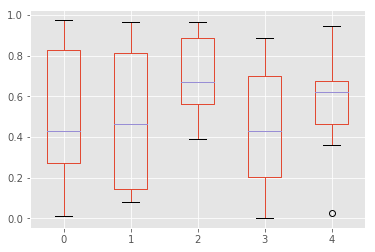

In [50]:
#可以使用DataFrame.boxplot来绘制boxplot的界面

df = pd.DataFrame(np.random.rand(10,5))
plt.figure()
bp = df.boxplot()

#注：使用和之前产生df一样的方法产生df，然后用df的boxplot方法画箱线图

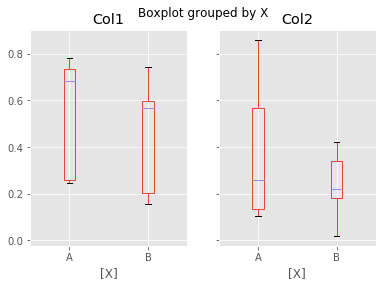

In [52]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
plt.figure()
bp = df.boxplot(by='X')
#注：在原有的df上增加一栏X，其中包含A，B两种分类，最后根据这种分类分别对col1和col2画箱线图

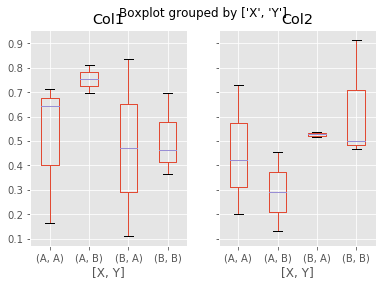

In [54]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
plt.figure();
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])
#注：这里传入两个分类依据，所以2X2有四种分类组合

In [55]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box.head()

#注：这里使用某种随机数种子产生器，随机产生一个50行2列的df

,0,1
0,0.471435,-1.190976
1,1.432707,-0.312652
2,-0.720589,0.887163
3,0.859588,-0.636524
4,0.015696,-2.242685


In [56]:
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.head()
#注：然后加一栏g，随机分为A,B两类

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B


In [57]:
df_box.loc[df_box['g'] == 'B', 1] += 3
df_box.head()

#注：定位到所有g栏属于B的行和第二列（索引是1），将其加3

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


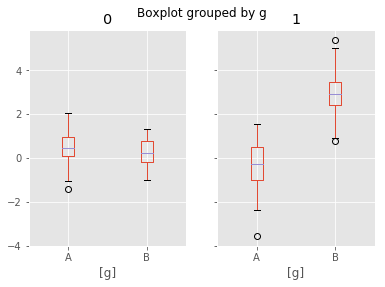

In [58]:
bp = df_box.boxplot(by='g')

#注：最后按照g栏分类画图，像之前两张图一样

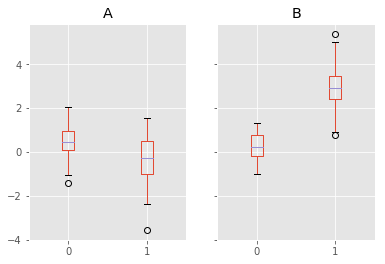

In [61]:
#和以下绘图代码注意对比：

bp = df_box.groupby('g').boxplot()

 #注：by有分开的意思，groupby有整合的意思

### 区域图、散点图 

可以使用Series.plot.area（）和DataFrame.plot.area（）创建区域图。 

默认情况下，区域图堆叠。 为了产生堆积区域图，每列必须是正值或全部负值。

当输入数据包含NaN时，它会自动填满0。

如果要删除缺失值或填充其他值，请在调用plot之前使用dataframe.dropna（）或dataframe.fillna（）。

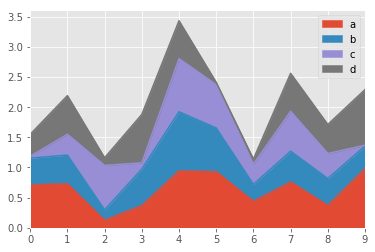

In [63]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()
# 注：随机产生标准正态分布的df，四栏分别绘制堆积区域图

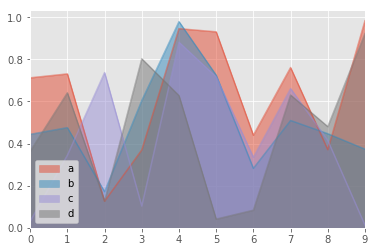

In [64]:
#为了产生一个未堆积的图，通过使参数stacked=False。

#除非另有规定，否则透明度：Alpha值设置为0.5，即半透明：

df.plot.area(stacked=False)

### 散点图

可以使用DataFrame.plot.scatter（）方法绘制散点图。 

散点图需要x和y轴的数字列。 这些可以由x和y关键字指定。

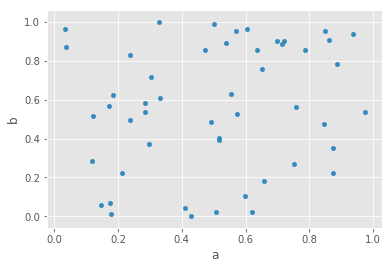

In [65]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

#注：将产生的a栏作为x轴数据，b栏作为y轴数据绘图

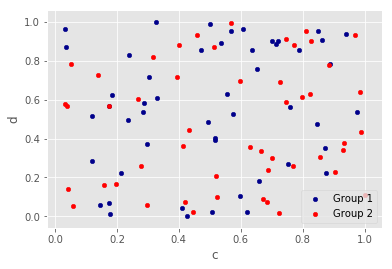

In [68]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='RED', label='Group 2', ax=ax)

#注：要在单个轴上绘制多个列组，要重复指定目标轴的绘图方法，建议指定颜色和标签关键字来区分每个组。

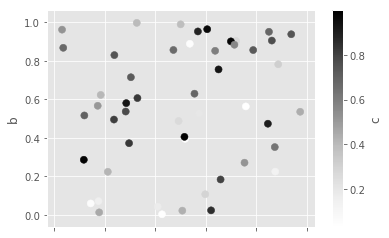

In [69]:
df.plot.scatter(x='a', y='b', c='c', s=50)

#注：关键字c可以作为列的名称给出，以为每个点提供颜色

你可以传递由matplotlib散点支持的其他关键字。

下面的示例显示使用数据框列值作为气泡大小的气泡图：


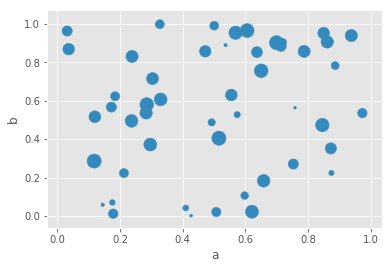

In [70]:
df.plot.scatter(x='a', y='b', s=df['c']*200)

#注：增加c栏作为气泡（散点）大小值